# Telecom Churn Prediction for high value customers

## Importing Libraries

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Display customizations
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
# importing dataset
tel_original = pd.read_csv('telecom_churn_data.csv')
tel_original.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
# Info
tel_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Here, we assume that there are three phases of customer lifecycle :

- The ‘good’ phase Month 6 & 7
- The ‘action’ phase Month 8
- The ‘churn’ phase Month 9

#### Here, since we are working over a four-month window.

In [6]:
# Let us first extract list of columns containing recharge amount
amt_recharge_columns =  tel_original.columns[tel_original.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


#### Analysis: From above features we can derive more meaningful information :

- Total recharge amount
- Total recharge for data
- Maximum recharge amount
- Last date of Recharging the data
- Average recharge amount for data.
- Maximum recharge for data</span>

In [7]:
# Checking missing values percentages
telecom_null_check = 100*tel_original.loc[:,amt_recharge_columns].isnull().sum()/len(tel_original)
df = pd.DataFrame(telecom_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
display(df)

Null_Percentage
total_rech_amt_6                 0.000000
total_rech_amt_7                 0.000000
total_rech_amt_8                 0.000000
total_rech_amt_9                 0.000000
max_rech_amt_6                   0.000000
max_rech_amt_7                   0.000000
max_rech_amt_8                   0.000000
max_rech_amt_9                   0.000000
date_of_last_rech_data_6        74.846748
date_of_last_rech_data_7        74.428744
date_of_last_rech_data_8        73.660737
date_of_last_rech_data_9        74.077741
total_rech_data_6               74.846748
total_rech_data_7               74.428744
total_rech_data_8               73.660737
total_rech_data_9               74.077741
max_rech_data_6                 74.846748
max_rech_data_7                 74.428744
max_rech_data_8                 73.660737
max_rech_data_9                 74.077741
av_rech_amt_data_6              74.846748
av_rech_amt_data_7              74.428744
av_rech_amt_data_8              73.660737
av_rech_amt_data_9              74.077741

#### Insights- We can see more then 74% values for recharge related data are missing.

In [8]:
tel_original.loc[:,amt_recharge_columns].describe()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

#### Insights-
- We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.
- Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [9]:
# imputing null values with zero
tel_original['total_rech_data_6'] = tel_original['total_rech_data_6'].replace(np.NaN,0.0)
tel_original['total_rech_data_7'] = tel_original['total_rech_data_7'].replace(np.NaN,0.0)
tel_original['total_rech_data_8'] = tel_original['total_rech_data_8'].replace(np.NaN,0.0)

In [10]:
# imputing null values with zero
tel_original['av_rech_amt_data_6'] = tel_original['av_rech_amt_data_6'].replace(np.NaN,0.0)
tel_original['av_rech_amt_data_7'] = tel_original['av_rech_amt_data_7'].replace(np.NaN,0.0)
tel_original['av_rech_amt_data_8'] = tel_original['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [11]:
# adding new column total recharge amount for data for calculating High Value customer process
tel_original['total_rech_amt_data_6'] = tel_original.av_rech_amt_data_6 * tel_original.total_rech_data_6
tel_original['total_rech_amt_data_7'] = tel_original.av_rech_amt_data_7 * tel_original.total_rech_data_7
tel_original['total_rech_amt_data_8'] = tel_original.av_rech_amt_data_8 * tel_original.total_rech_data_8

### Defining total average recharge amount for good phase for months 6 and 7 (the good phase)

In [12]:
tel_original['total_avg_rech_amnt_6_7'] = (tel_original.total_rech_amt_6 + tel_original.total_rech_amt_data_6 + tel_original.total_rech_amt_7+ tel_original.total_rech_amt_data_7)/2

### Filtering High Value Customers

#### Threshold amount will be more than or equal 70th percentile of the average recharge amount for the first two months (the good phase). The top 30% will be considered as high value customers

In [13]:
# filtering high value customers
high_value_filter = tel_original.total_avg_rech_amnt_6_7.quantile(0.7)

print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter))

high_value_customer = tel_original[tel_original.total_avg_rech_amnt_6_7 > high_value_filter]
print('Dataframe Shape after Filtering High Value Customers: ' + str(high_value_customer.shape))

70 percentile of 6th and 7th months avg recharge amount: 478.0
Dataframe Shape after Filtering High Value Customers: (29953, 230)


### Tagging Churn

#### Tag churners and remove attributes of the churn phase

- churned customers(churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
- The attributes needed are:total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9
- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [14]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [15]:
# Checking the Null values are present or Not
df = 100*high_value_customer.loc[:,high_val_cust_9].isnull().sum()/len(high_value_customer)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
display(df)

Null_Percentage
total_ic_mou_9              0.0
total_og_mou_9              0.0
vol_2g_mb_9                 0.0
vol_3g_mb_9                 0.0

In [16]:
# Initially set all the values as 0
high_value_customer['churn']= 0

In [17]:
#is_churned boolean flag for customers where above values are zero
is_churned = (high_value_customer.total_ic_mou_9 == 0) & \
             (high_value_customer.total_og_mou_9 == 0) & \
             (high_value_customer.vol_2g_mb_9 ==0) & \
             (high_value_customer.vol_3g_mb_9 ==0)

In [18]:
# set all which having is_churned True condition as 1
high_value_customer.loc[is_churned,'churn']=1

In [19]:
# % of customer churned
100*high_value_customer.churn.sum()/len(high_value_customer)

8.122725603445398

In [20]:
churn_month_columns =  high_value_customer.columns[high_value_customer.columns.str.contains('_9')]

In [21]:
churn_month_columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [22]:
# drop all columns corresponding to the churn phase
high_value_customer.drop(churn_month_columns,axis=1,inplace=True)

In [23]:
high_value_customer.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

In [24]:
high_value_customer.shape

(29953, 177)

## Exploratory Data Analysis

In [25]:
high_value_customer.nunique()[high_value_customer.nunique()<10]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
night_pck_user_6        2
night_pck_user_7        2
night_pck_user_8        2
monthly_2g_6            5
monthly_2g_7            6
monthly_2g_8            6
fb_user_6               2
fb_user_7               2
fb_user_8               2
churn                   2
dtype: int64

In [26]:
# dropping columns with only one unique values
unique_value_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [27]:
print("Features before dropping unique_value_col : "+ str(high_value_customer.shape[1]))
high_value_customer.drop(unique_value_col,axis=1,inplace=True)
print("Features after dropping unique_value_col : "+ str(high_value_customer.shape[1]))

Features before dropping unique_value_col : 177
Features after dropping unique_value_col : 164


In [28]:
# object columns
mylist = list(high_value_customer.select_dtypes(include=['object']).columns)
for i in mylist:
    print(i)

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [29]:
high_value_customer[mylist].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0            6/21/2014           7/16/2014            8/8/2014   
7            6/27/2014           7/25/2014           8/26/2014   
8            6/25/2014           7/31/2014           8/30/2014   
21           6/30/2014           7/31/2014           8/31/2014   
23           6/18/2014            7/7/2014           8/24/2014   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                 6/21/2014                7/16/2014                 8/8/2014  
7                       NaN                      NaN                      NaN  
8                       NaN                7/31/2014                8/23/2014  
21                      NaN                      NaN                      NaN  
23                      NaN                 7/7/2014                 8/6/2014

In [30]:
# converting to datetime
for i in high_value_customer[mylist]:
    high_value_customer[i] = pd.to_datetime(high_value_customer[i])

In [31]:
high_value_customer[mylist].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           2014-06-21          2014-07-16          2014-08-08   
7           2014-06-27          2014-07-25          2014-08-26   
8           2014-06-25          2014-07-31          2014-08-30   
21          2014-06-30          2014-07-31          2014-08-31   
23          2014-06-18          2014-07-07          2014-08-24   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                2014-06-21               2014-07-16               2014-08-08  
7                       NaT                      NaT                      NaT  
8                       NaT               2014-07-31               2014-08-23  
21                      NaT                      NaT                      NaT  
23                      NaT               2014-07-07               2014-08-06

In [32]:
high_value_customer.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [33]:
recharge_amnt_columns =  high_value_customer.columns[high_value_customer.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

In [34]:
def box_plot(attribute):
    fig, ax= plt.subplots(ncols=3, nrows=1, figsize=(12,5), dpi=80)
    plt.style.use('ggplot')
    sns.set_context('notebook')
    sns.boxplot(y=attribute+"_6",x='churn',data=high_value_customer, hue='churn', showfliers=False, ax=ax[0])
    sns.boxplot(y=attribute+"_7",x='churn',data=high_value_customer, hue='churn', showfliers=False, ax=ax[1])
    sns.boxplot(y=attribute+"_8",x='churn',data=high_value_customer, hue='churn', showfliers=False, ax=ax[2])
    plt.tight_layout()
    plt.show()

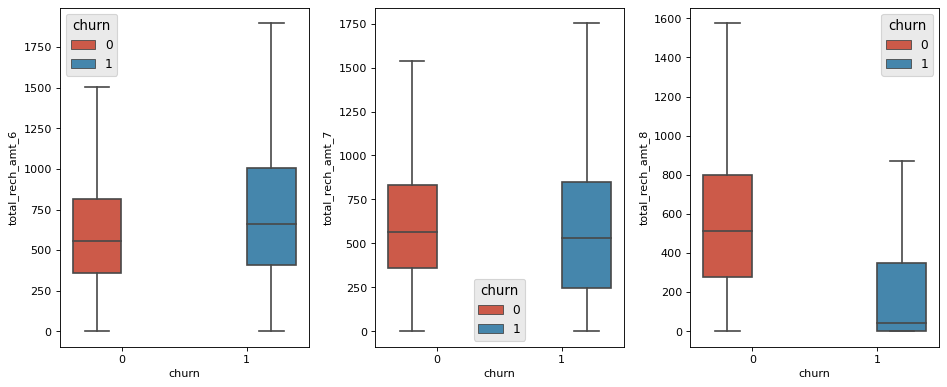

In [35]:
box_plot('total_rech_amt')

#### Insights:
- We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

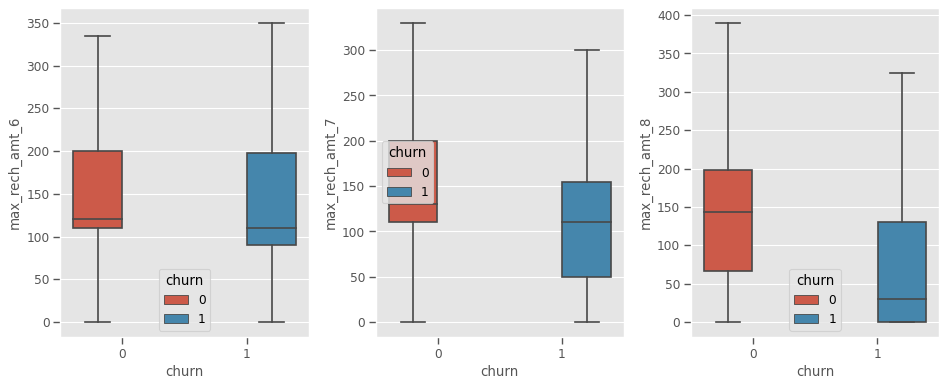

In [36]:
box_plot('max_rech_amt')

#### Insights:
- We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

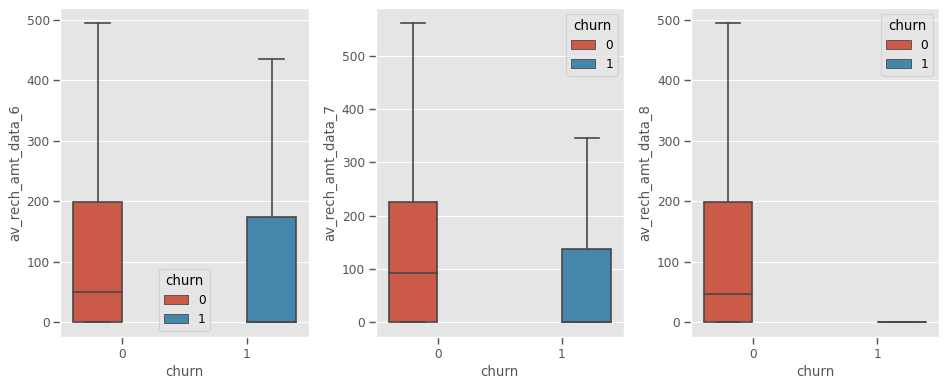

In [37]:
box_plot('av_rech_amt_data')

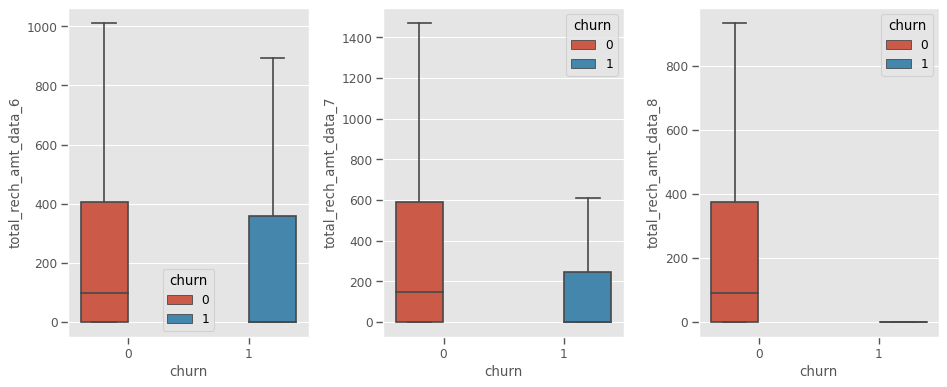

In [38]:
box_plot('total_rech_amt_data')

#### Insights:
- It is clear from above two boxplots of total_rech_amt_data and av_rech_amt_data that 8th has significant decline in recharge.

In [39]:
other_recharge_col = high_value_customer.columns[high_value_customer.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [40]:
display(other_recharge_col)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [41]:
# lets check the % of NA values for other recharge related variables
100*high_value_customer.loc[:,other_recharge_col].isnull().sum()/len(high_value_customer)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.112443
max_rech_data_7     43.117551
max_rech_data_8     46.799987
dtype: float64

In [42]:
high_value_customer.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8
count     16740.000000     17038.000000     15935.000000
mean        139.804002       140.444712       136.353373
std         118.892926       120.295284       119.571138
min           1.000000         1.000000         1.000000
25%          25.000000        25.000000        25.000000
50%         152.000000       152.000000       152.000000
75%         198.000000       198.000000       198.000000
max        1555.000000      1555.000000      1555.000000

#### Insights:
- We see that the minimum value is 1 while the max is 1555 across months, which indicate the missing values are where no recharges happened for the data, Filling the missing values by 0 , means no recharge.

In [43]:
# imputing null values with zero
high_value_customer.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= high_value_customer.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

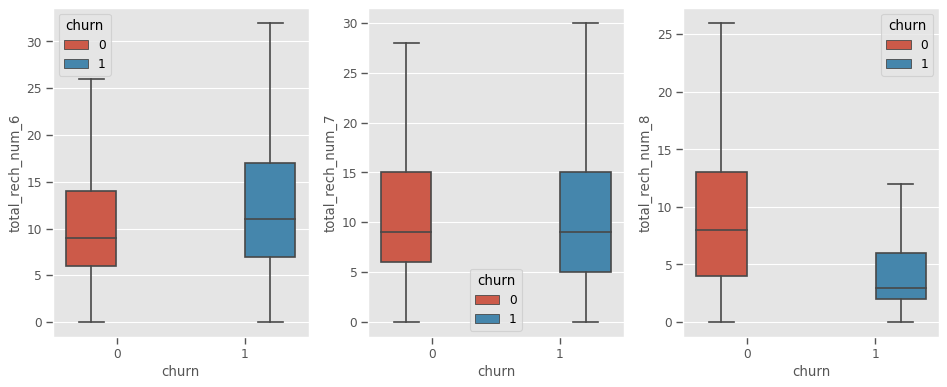

In [44]:
box_plot('total_rech_num')

#### Insights:
- Here as well their is a huge drop in total recharge number in the 8th month for churned customers.

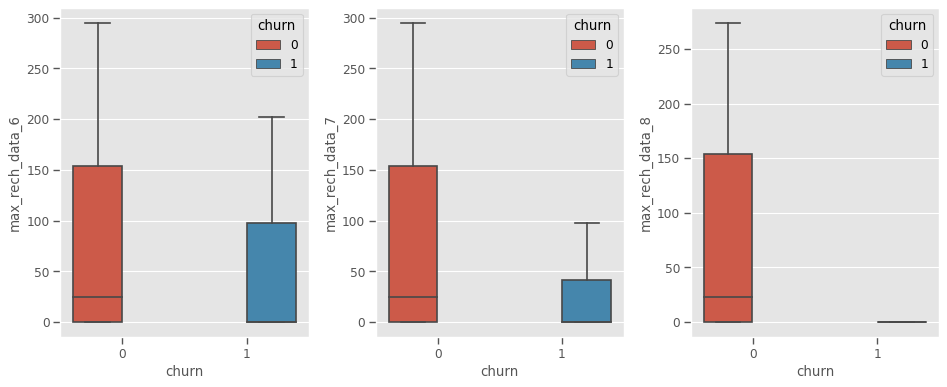

In [45]:
box_plot('max_rech_data')

#### Insights:
- Again their is a huge drop in max recharge data in the 8th month for churned customers.

In [46]:
#Getting the last day recharge amount columns
last_day_rech_amt = high_value_customer.columns[high_value_customer.columns.str.contains('day')]

In [47]:
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

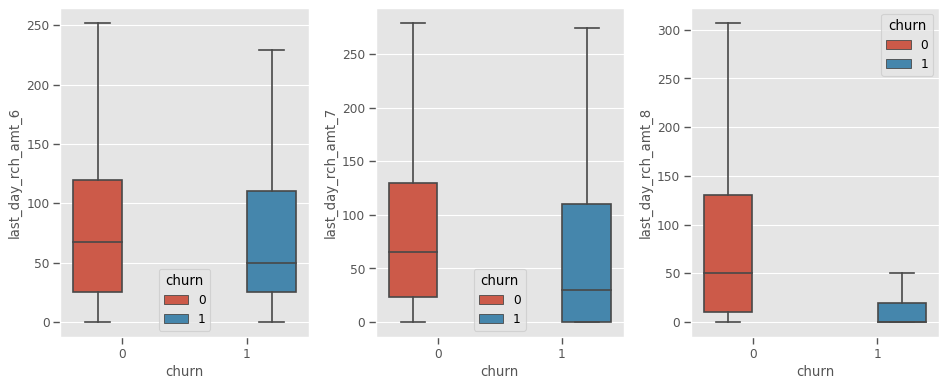

In [48]:
box_plot('last_day_rch_amt')

### 2g and 3g related columns

In [49]:
col_2g_and_3g = high_value_customer.columns[high_value_customer.columns.str.contains('2g|3g',regex=True)]

In [50]:
col_2g_and_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [51]:
percentage_3g_2g_null_check = 100*high_value_customer.loc[:,col_2g_and_3g].isnull().sum()/len(high_value_customer.loc[:,col_2g_and_3g])
df = pd.DataFrame(percentage_3g_2g_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
display(df)

Null_Percentage
count_rech_2g_6        44.112443
count_rech_2g_7        43.117551
count_rech_2g_8        46.799987
count_rech_3g_6        44.112443
count_rech_3g_7        43.117551
count_rech_3g_8        46.799987
vol_2g_mb_6             0.000000
vol_2g_mb_7             0.000000
vol_2g_mb_8             0.000000
vol_3g_mb_6             0.000000
vol_3g_mb_7             0.000000
vol_3g_mb_8             0.000000
arpu_3g_6              44.112443
arpu_3g_7              43.117551
arpu_3g_8              46.799987
arpu_2g_6              44.112443
arpu_2g_7              43.117551
arpu_2g_8              46.799987
monthly_2g_6            0.000000
monthly_2g_7            0.000000
monthly_2g_8            0.000000
sachet_2g_6             0.000000
sachet_2g_7             0.000000
sachet_2g_8             0.000000
monthly_3g_6            0.000000
monthly_3g_7            0.000000
monthly_3g_8            0.000000
sachet_3g_6             0.000000
sachet_3g_7             0.000000
sachet_3g_8             0.000000
aug_vbc_3g              0.000000
jul_vbc_3g              0.000000
jun_vbc_3g              0.000000
sep_vbc_3g              0.000000

#### Insights:
- We are getting more then 40% values are not available for count of recharge and average revenue for 2G and 3G per user.These columns can bed dropped.

In [52]:
high_value_customer.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

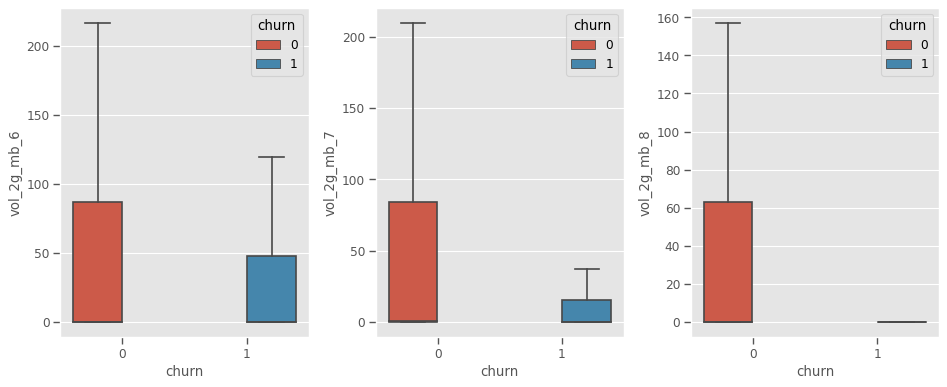

In [53]:
box_plot('vol_2g_mb')

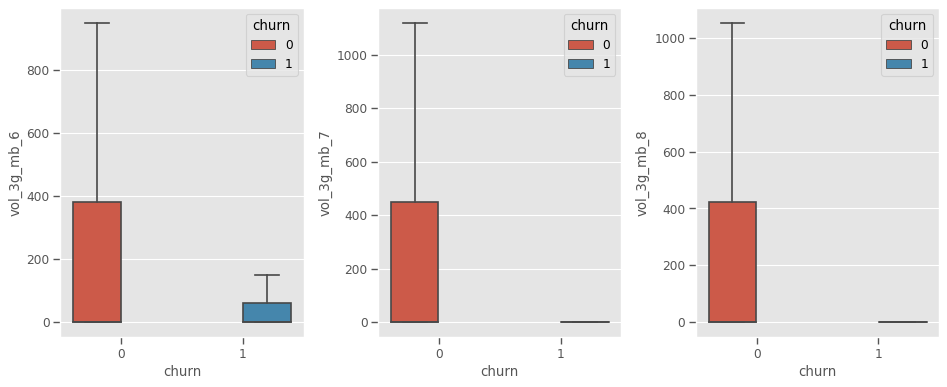

In [54]:
box_plot('vol_3g_mb')

In [55]:
# Renaming month named vbc columns to 6,7,8,9 format
high_value_customer.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
high_value_customer.drop('vbc_3g_9',axis=1,inplace=True)

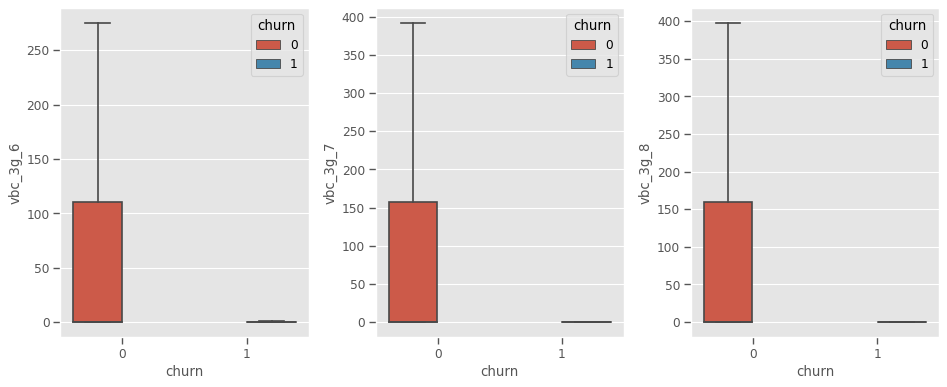

In [56]:
box_plot('vbc_3g')

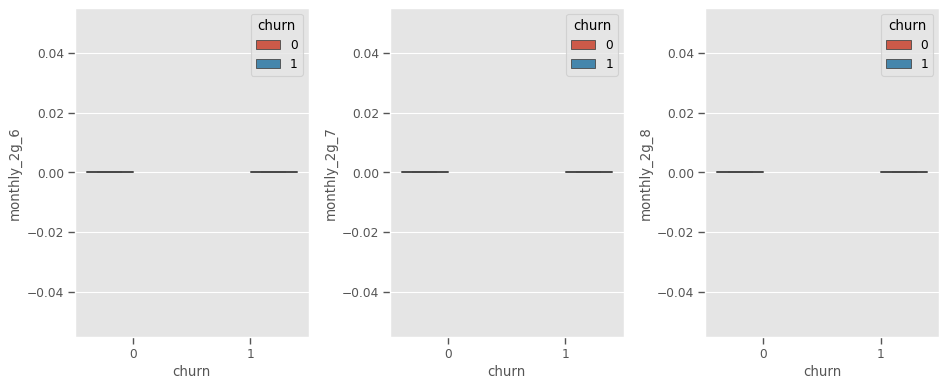

In [57]:
box_plot('monthly_2g')

In [58]:
# let's check monthly 2G/3G service schemes
monthly_2g_3g = high_value_customer.columns[high_value_customer.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [59]:
def mean_bar_plot(df, lst):
    churn_0 = df[df.churn==0].filter(lst)
    churn_1 = df[df.churn==1].filter(lst)

    mean_df_0 = pd.DataFrame([churn_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([churn_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

In [60]:
mean_bar_plot(high_value_customer, monthly_2g_3g)

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  \
Non Churn      0.181613      0.193096      0.165080      0.219840   
Churn          0.093711      0.071106      0.023017      0.198109   

           monthly_3g_7  monthly_3g_8  
Non Churn      0.236882      0.224891  
Churn          0.144266      0.057131

#### Insights:
- Again a clear drop in monthly subscription for churned customers in 8th Month.

In [61]:
vbc_column = high_value_customer.columns[high_value_customer.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [62]:
mean_bar_plot(high_value_customer, vbc_column)

vbc_3g_8    vbc_3g_7    vbc_3g_6
Non Churn  180.622636  186.370503  162.557305
Churn       40.940884   96.340707  115.461780

#### insights:
  - Significantly it is showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

In [63]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_3g_col =high_value_customer.columns[high_value_customer.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

In [64]:
SC_2g_3g_col.to_list()

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

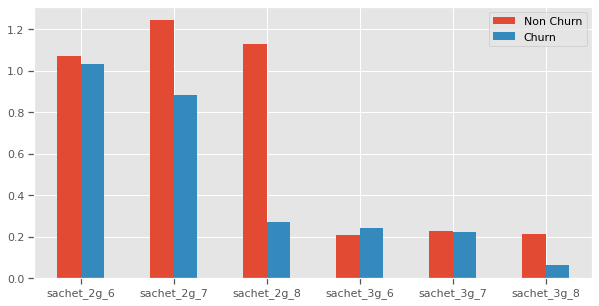

sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_3g_6  sachet_3g_7  \
Non Churn     1.070531     1.245203     1.125145     0.206577     0.228307   
Churn         1.032470     0.879984     0.270859     0.244554     0.221948   

           sachet_3g_8  
Non Churn     0.214571  
Churn         0.065351

In [65]:
mean_bar_plot(high_value_customer, SC_2g_3g_col)

In [66]:
box_plot('arpu')

In [67]:
mou = high_value_customer.columns[high_value_customer.columns.str.contains('mou')]

In [68]:
mou.to_list()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_i

In [69]:
mou_null_check = 100*high_value_customer.loc[:,mou].isnull().sum()/len(high_value_customer.loc[:,mou])
df = pd.DataFrame(mou_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
display(df)

Null_Percentage
onnet_mou_6              1.809502
onnet_mou_7              1.789470
onnet_mou_8              3.912797
offnet_mou_6             1.809502
offnet_mou_7             1.789470
offnet_mou_8             3.912797
roam_ic_mou_6            1.809502
roam_ic_mou_7            1.789470
roam_ic_mou_8            3.912797
roam_og_mou_6            1.809502
roam_og_mou_7            1.789470
roam_og_mou_8            3.912797
loc_og_t2t_mou_6         1.809502
loc_og_t2t_mou_7         1.789470
loc_og_t2t_mou_8         3.912797
loc_og_t2m_mou_6         1.809502
loc_og_t2m_mou_7         1.789470
loc_og_t2m_mou_8         3.912797
loc_og_t2f_mou_6         1.809502
loc_og_t2f_mou_7         1.789470
loc_og_t2f_mou_8         3.912797
loc_og_t2c_mou_6         1.809502
loc_og_t2c_mou_7         1.789470
loc_og_t2c_mou_8         3.912797
loc_og_mou_6             1.809502
loc_og_mou_7             1.789470
loc_og_mou_8             3.912797
std_og_t2t_mou_6         1.809502
std_og_t2t_mou_7         1.789470
std_og_t2t_mou_8         3.912797
std_og_t2m_mou_6         1.809502
std_og_t2m_mou_7         1.789470
std_og_t2m_mou_8         3.912797
std_og_t2f_mou_6         1.809502
std_og_t2f_mou_7         1.789470
std_og_t2f_mou_8         3.912797
std_og_mou_6             1.809502
std_og_mou_7             1.789470
std_og_mou_8             3.912797
isd_og_mou_6             1.809502
isd_og_mou_7             1.789470
isd_og_mou_8             3.912797
spl_og_mou_6             1.809502
spl_og_mou_7             1.789470
spl_og_mou_8             3.912797
total_og_mou_6           0.000000
total_og_mou_7           0.000000
total_og_mou_8           0.000000
loc_ic_t2t_mou_6         1.809502
loc_ic_t2t_mou_7         1.789470
loc_ic_t2t_mou_8         3.912797
loc_ic_t2m_mou_6         1.809502
loc_ic_t2m_mou_7         1.789470
loc_ic_t2m_mou_8         3.912797
loc_ic_t2f_mou_6         1.809502
loc_ic_t2f_mou_7         1.789470
loc_ic_t2f_mou_8         3.912797
loc_ic_mou_6             1.809502
loc_ic_mou_7             1.789470
loc_ic_mou_8             3.912797
std_ic_t2t_mou_6         1.809502
std_ic_t2t_mou_7         1.789470
std_ic_t2t_mou_8         3.912797
std_ic_t2m_mou_6         1.809502
std_ic_t2m_mou_7         1.789470
std_ic_t2m_mou_8         3.912797
std_ic_t2f_mou_6         1.809502
std_ic_t2f_mou_7         1.789470
std_ic_t2f_mou_8         3.912797
std_ic_mou_6             1.809502
std_ic_mou_7             1.789470
std_ic_mou_8             3.912797
total_ic_mou_6           0.000000
total_ic_mou_7           0.000000
total_ic_mou_8           0.000000
spl_ic_mou_6             1.809502
spl_ic_mou_7             1.789470
spl_ic_mou_8             3.912797
isd_ic_mou_6             1.809502
isd_ic_mou_7             1.789470
isd_ic_mou_8             3.912797

In [70]:
df.Null_Percentage.max()

3.91279671485327

In [71]:
high_value_customer.loc[:,mou] = high_value_customer.loc[:,mou].replace(np.NaN,0)

In [72]:
mou_og = high_value_customer.columns[high_value_customer.columns.str.contains('.*_og_.*',regex=True)]

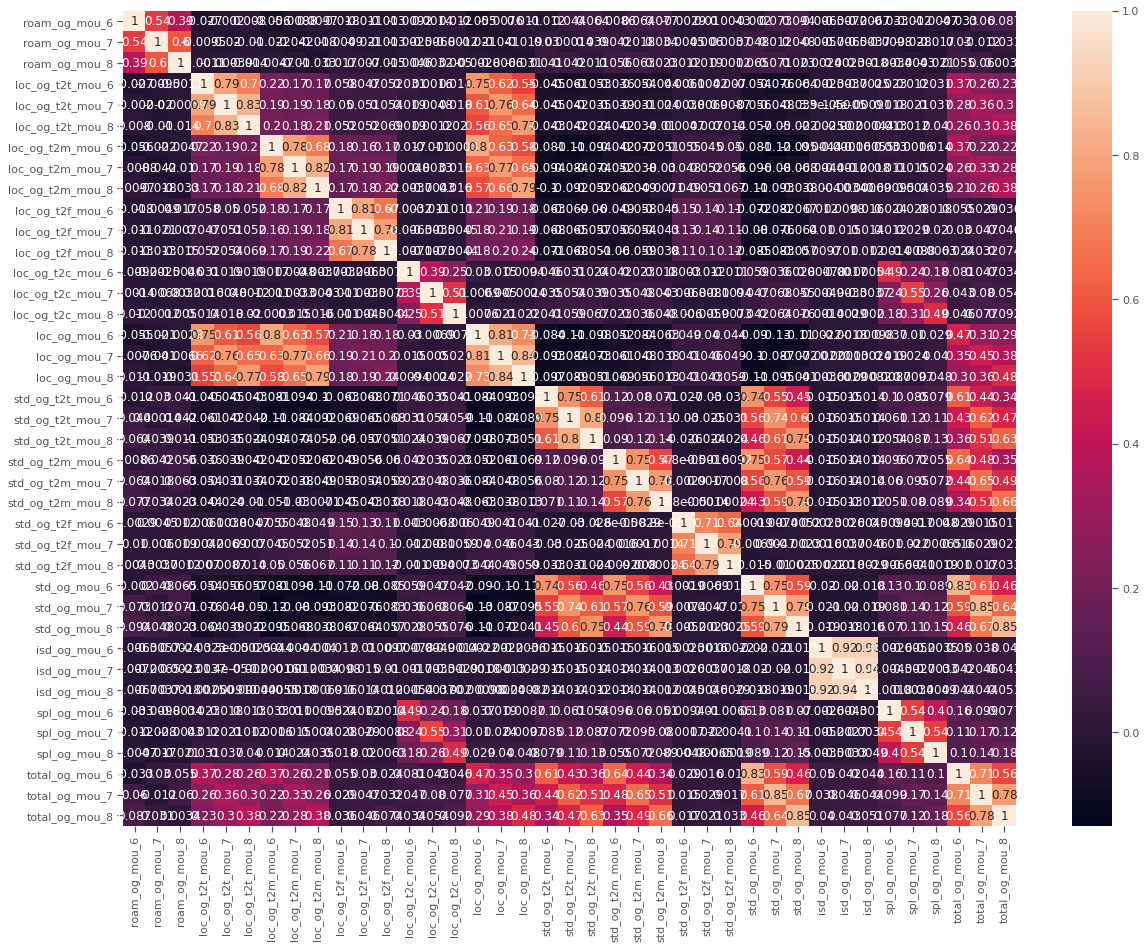

In [73]:
plt.figure(figsize=(20,15))
sns.heatmap(high_value_customer[mou_og].corr(), annot=True, cmap='rocket')
plt.show()

#### Insights:
- Now, as we can see there are visible clusters in heatmap. These clusters show correaltion amongst the features of outgoing, total, and std features. These features shall be removed
- loc_og, log_og_t2t, log_og_t2m, total_og, std_og, std_og_t2t, std_og_t2m are all correlated with each other for all 6,7 and 8th month

In [74]:
mou_ig = high_value_customer.columns[high_value_customer.columns.str.contains('.*_ic_.*',regex=True)]

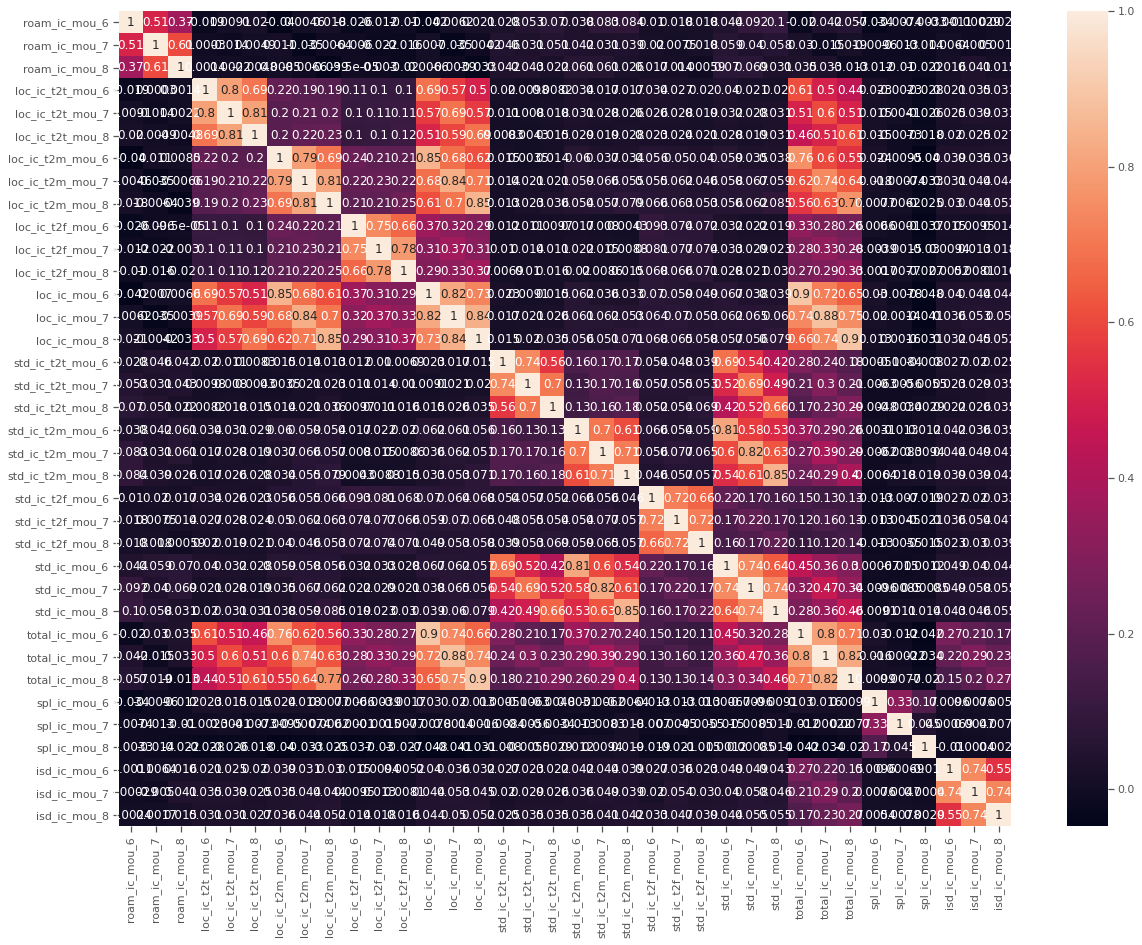

In [75]:
plt.figure(figsize=(20,15))
sns.heatmap(high_value_customer[mou_ig].corr(), annot=True, cmap='rocket')
plt.show()

#### Insights:
- Now, here as well we can see there are visible clusters in heatmap. These clusters show correaltion amongst the features of incoming, total, and std features. These features shall be removed
- loc_ic, loc_ic_t2t, loc_ic_t2m, total_ic, std_ic, std_ic_t2t, std_ic_t2m are all correlated with each other for all 6,7 and 8th month

In [76]:
col_drop = high_value_customer.columns[high_value_customer.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou|total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
high_value_customer.drop(col_drop,axis=1,inplace=True)
print("Columns dropped - ")
col_drop.tolist()

Columns dropped - 


['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [77]:
mou_ig_og = high_value_customer.columns[high_value_customer.columns.str.contains('_ic_|_og_',regex=True)]

In [78]:
mou_ig_og

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7

In [79]:
plt.figure(figsize=(30,21))
sns.heatmap(high_value_customer[mou_ig_og].corr(), annot=True)
plt.show()

#### Insights:
- There does seem to be a bit of correlation here but we will let model decide which features are best.

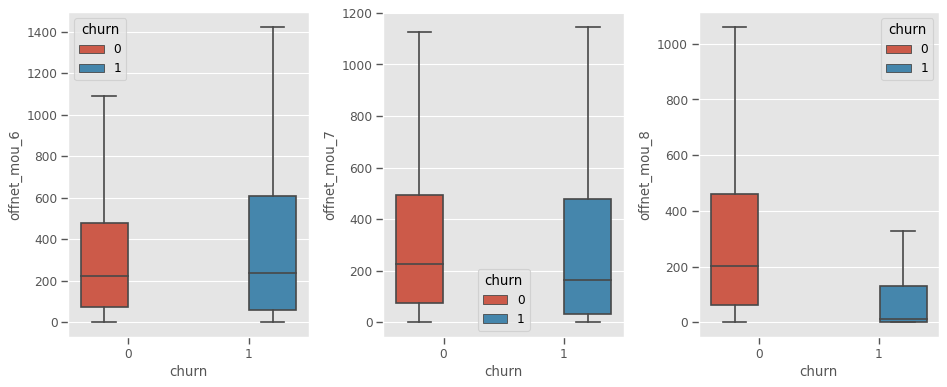

In [80]:
box_plot('offnet_mou')

#### Insights:
- Drop in services in 8th month

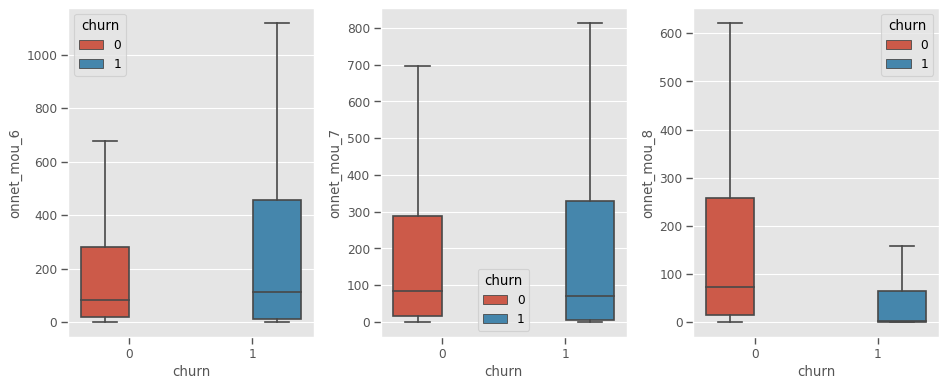

In [81]:
box_plot('onnet_mou')

In [82]:
tenure_data = high_value_customer.copy()

In [83]:
tenure_data['tenure'] = tenure_data['aon']/30
tenure_range = [0, 6, 12, 24, 60, 61]
label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tenure_range, labels=label)
tenure_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

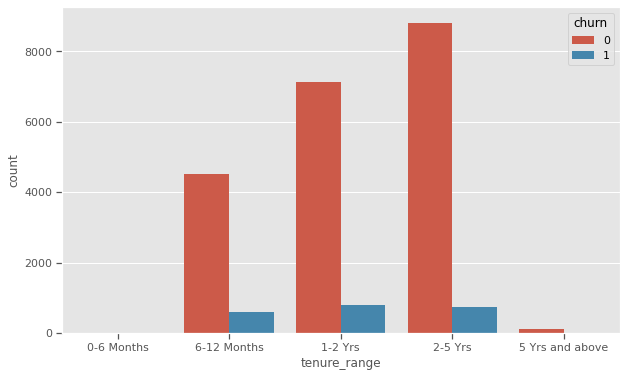

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data)
plt.show()

#### Insights:
- It clear that customers using services for more than 5yrs do not churn.
- Also, customer are not churning in the first 6 months.

In [85]:
fb = high_value_customer.columns[high_value_customer.columns.str.contains('fb_user',regex=True)]

In [86]:
fb.to_list()

['fb_user_6', 'fb_user_7', 'fb_user_8']

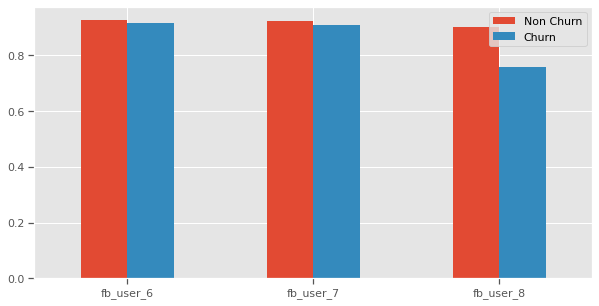

fb_user_6  fb_user_7  fb_user_8
Non Churn   0.927345   0.922594   0.901331
Churn       0.916078   0.907757   0.758170

In [87]:
mean_bar_plot(high_value_customer, fb)

In [88]:
night_pck = high_value_customer.columns[high_value_customer.columns.str.contains('night_pck',regex=True)]

In [89]:
night_pck.to_list()

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

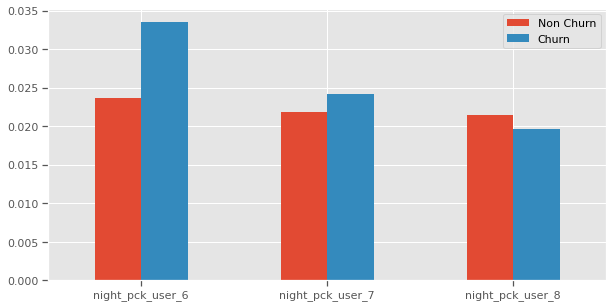

night_pck_user_6  night_pck_user_7  night_pck_user_8
Non Churn          0.023642          0.021885          0.021453
Churn              0.033569          0.024109          0.019608

In [90]:
mean_bar_plot(high_value_customer, night_pck)

#### Insights:
- A decreasing trend is seen for night pck user.

In [91]:
drop_colss = round(high_value_customer.isnull().sum()/len(high_value_customer)*100, 2)[round(high_value_customer.isnull().sum()/len(high_value_customer)*100, 2)>30]

In [92]:
drop_colss = drop_colss.index

In [93]:
high_value_customer.drop(drop_colss, axis=1, inplace=True)

In [94]:
round(high_value_customer.isnull().sum()/len(high_value_customer)*100, 2)[round(high_value_customer.isnull().sum()/len(high_value_customer)*100, 2)>0]

og_others_6            1.81
og_others_7            1.79
og_others_8            3.91
ic_others_6            1.81
ic_others_7            1.79
ic_others_8            3.91
date_of_last_rech_6    0.24
date_of_last_rech_7    0.33
date_of_last_rech_8    1.94
dtype: float64

In [95]:
others = high_value_customer.columns[high_value_customer.columns.str.contains('og_others_|ic_others_',regex=True)]

In [96]:
others.to_list()

['og_others_6',
 'og_others_7',
 'og_others_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8']

In [97]:
for i in others:
    high_value_customer.loc[high_value_customer[i].isnull(), i]=0

In [98]:
high_value_customer[others].isnull().sum()

og_others_6    0
og_others_7    0
og_others_8    0
ic_others_6    0
ic_others_7    0
ic_others_8    0
dtype: int64

In [99]:
high_value_customer.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
21            808.74            876.99              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0               0.00           0.0          0.00          0.00           0.0   
7              16.68           0.0          0.18         10.01           4.5   
8           

In [100]:
high_value_customer.shape

(29953, 124)

#### Combining 6th and 7th month taking an average of both the columns

In [101]:
high_value_customer.drop(["total_avg_rech_amnt_6_7"],axis=1,inplace=True)
high_value_customer.drop(high_value_customer.filter(regex='date_').columns,axis=1,inplace=True)
print (high_value_customer.shape)

(29953, 120)


In [102]:
col_6_7_list = high_value_customer.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_6_7_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    high_value_customer[avg_col_name] = (high_value_customer[col_6]  + high_value_customer[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [103]:
# removing unnecessary columns
col_list_to_drop = high_value_customer.filter(regex='_6|_7')
high_value_customer.drop(col_list_to_drop,axis=1,inplace=True)
high_value_customer.shape

(29953, 81)

In [104]:
high_value_customer.head()

mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7               0.00             12.01             49.14             16.68   
8               7.15             22.58             75.69              0.00   
21              0.00             61.79            876.99              0.00   
23             17.71              0.00             39.61              0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  \
0           0.00          0.00          0.0              0.16   
7          10.01          6.50          0.0             27.31   
8           0.00         10.23          0.0              0.31   
21          0.00          0.00          0.0             19.54   
23          0.00         17.71          0.0             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0               4.13              1.15              0.00              0.00   
7             121.19             39.53             30.39            141.33   
8              15.48              0.00              0.10              0.65   
21            129.16             10.39              0.18            101.74   
23            146.84              0.71             13.38             43.91   

    std_ic_t2f_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0               0.00           0.0          0.00         0.00   
7              22.21           0.0         31.59        15.14   
8               0.00           0.0          0.00         0.00   
21              0.00           0.0          0.00         0.00   
23              0.00           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0                  2               252             252                 252   
7                  7              3638            1580                 779   
8                 14               120              30                  10   
21                27               718              50                  50   
23                 4               439             179                   0   

    total_rech_data_8  max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
0                 1.0            252.0               252.0         5.75   
7                 0.0              0.0                 0.0         0.00   
8                 3.0             23.0                69.0         0.03   
21                0.0              0.0                 0.0         0.00   
23                2.0            179.0               270.0         0.01   

    vol_3g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  aon  \
0        109.61             0            0             1            0  968   
7          0.00             0            0             0            0  802   
8         11.94             0            3             0            0  315   
21         0.00             0            0             0            0  720   
23      1009.92             0            0             1            1  604   

    v

# Model Building

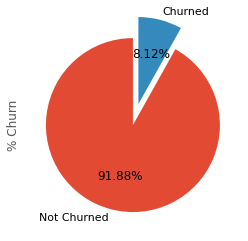

In [105]:
high_value_customer["churn"].value_counts().plot.pie(explode=[0,0.25],autopct='%1.2f%%', labels=("Not Churned", "Churned"), startangle=90)
plt.ylabel('% Churn')
plt.show()

### Churn Rate

In [106]:
# churn rate
round(high_value_customer['churn'].sum()/len(high_value_customer['churn'])*100,2)

8.12

In [107]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [108]:
y= high_value_customer['churn']
X= high_value_customer.drop(['churn','mobile_number'], axis=1)

In [109]:
X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7              12.01             49.14             16.68         10.01   
8              22.58             75.69              0.00          0.00   
21             61.79            876.99              0.00          0.00   
23              0.00             39.61              0.00          0.00   

    spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
0           0.00          0.0              0.16              4.13   
7           6.50          0.0             27.31            121.19   
8          10.23          0.0              0.31             15.48   
21          0.00          0.0             19.54            129.16   
23         17.71          0.0             76.64            146.84   

    loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
0               1.15              0.00              0.00              0.00   
7              39.53             30.39            141.33             22.21   
8               0.00              0.10              0.65              0.00   
21             10.39              0.18            101.74              0.00   
23              0.71             13.38             43.91              0.00   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            0.0          0.00         0.00                 2   
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
21           0.0          0.00         0.00                27   
23           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                252             252                 252                1.0   
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
21               718              50                  50                0.0   
23               439             179                   0                2.0   

    max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  \
0             252.0               252.0         5.75       109.61   
7               0.0                 0.0         0.00         0.00   
8              23.0                69.0         0.03        11.94   
21              0.0                 0.0         0.00         0.00   
23            179.0               270.0         0.01      1009.92   

    monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  aon  vbc_3g_8  \
0              0            0             1            0  968     30.40   
7              0            0             0            0  802     57.74   
8              0            3             0            0  315     21.03   
21             0            0             0            0  720      0.00   
23             0            0             1            1  604     40.45   

    total_rech_amt_data_8  avg_arpu_a

In [110]:
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [111]:
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
X_scale_final.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0 -0.587674    -0.510841     -0.695309      -0.168679      -0.189787   
1  5.302613    -0.396856     -0.019115       0.257863       0.173388   
2 -0.739908    -0.434372     -0.412142      -0.168679      -0.189787   
3  0.256647    -0.325248      1.345016      -0.168679      -0.189787   
4 -0.282646    -0.437642     -0.268131      -0.168679      -0.189787   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0         -0.343476         -0.649478         -0.301900         -0.238110   
1         -0.166450          0.044793          2.425615         -0.238110   
2         -0.288584         -0.433257         -0.301900          0.762241   
3         -0.240899         -0.201077         -0.220941         -0.238110   
4         -0.195895         -0.013904         -0.301900          2.239684   

   std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
0         -0.373493         -0.384626         -0.145041     -0.043625   
1         -0.343304         -0.264487          1.379645      0.180077   
2         -0.316735         -0.199578         -0.145041     -0.043625   
3         -0.218176          1.759453         -0.145041     -0.043625   
4         -0.373493         -0.287786         -0.145041     -0.043625   

   spl_og_mou_8  og_others_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
0     -0.322777     -0.01739         -0.393039         -0.661296   
1     -0.002416     -0.01739         -0.222309         -0.116813   
2      0.181421     -0.01739         -0.392096         -0.608504   
3     -0.322777     -0.01739         -0.271170         -0.079742   
4      0.550083     -0.01739          0.087897          0.002494   

   loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
0         -0.306103         -0.194993         -0.270094         -0.128812   
1          0.579561          0.230718          1.097095          0.986581   
2         -0.332641         -0.193592         -0.263806         -0.128812   
3         -0.092879         -0.192471          0.714112         -0.128812   
4         -0.316256         -0.007562          0.154680         -0.128812   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0     -0.239999     -0.155900    -0.095845         -0.859812   
1     -0.239999      0.291204     1.087598         -0.320785   
2     -0.239999     -0.155900    -0.095845          0.433852   
3     -0.239999     -0.155900    -0.095845          1.835322   
4     -0.239999     -0.102967     0.925012         -0.644201   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0         -0.544124        0.529591            1.098537          -0.207844   
1          4.993406        8.192812            4.726892          -0.541457   
2         -0.760000       -0.751459           -0.567614           0.459382   
3          0.217981       -0.636049           -0.292217          -0.541457   
4         -0.238301        0.108345           -0.636463           0.125769   

   max_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  \
0         1.622450            0.663408    -0.319829    -0.263422   
1        -0.655815           -0.624657    -0.338197    -0.382626   
2        -0.447878           -0.271972    -0.338101    -0.369641   
3        -0.655815           -0.624657    -0.338197    -0.382626   
4         0.962476            0.755412    -0.338165     0.715694   

   monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8       aon  vbc_3g_8  \
0     -0.377738    -0.416099      1.276531    -0.183926 -0.252008 -0.329779   
1     -0.377738    -0.416099     -0.341921    -0.183926 -0.425388 -0.264857   
2     -0.377738     0.766276     -0.341921    -0.183926 -0.934039 -0.352029   
3     -0.377738    -0.416099     -0.341921    -0.183926 -0.511034 -0.401967   
4     -0.377738    -0.416099      1.276531     0.724573 -0.632191 -0.305914   

   total_rech_amt_data_8  avg_arpu_av67  avg_onnet_mou_av67 

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [113]:
print("Shape of train datatset before : "+str(x_train.shape))
print("Shape of train datatset before : "+str(y_train.shape))

Shape of train datatset before : (20967, 79)
Shape of train datatset before : (20967,)


## Applying SMOTE to balance data

In [114]:
# Initializing Smote
smt = SMOTE(random_state=100)
x_tr,y_tr = smt.fit_resample(x_train,y_train.ravel())
print("Shape of train datatset after SMOTE : "+str(x_tr.shape))
print("Shape of train datatset after SMOTE : "+str(y_tr.shape))

Shape of train datatset after SMOTE : (38528, 79)
Shape of train datatset after SMOTE : (38528,)


In [115]:
print("counts of label '1':",sum(y_tr==1))
print("counts of label '0':",sum(y_tr==0))

counts of label '1': 19264
counts of label '0': 19264


## PCA

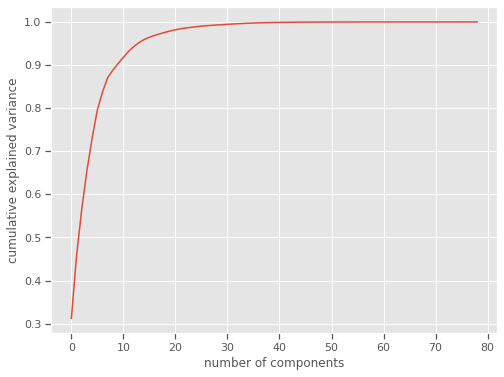

In [116]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(x_tr)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [117]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':X_scale_final.columns})
df_pca.head(10)

PC1       PC2       PC3           Feature
0  0.052560  0.378498  0.028795            arpu_8
1 -0.021012  0.170547  0.078160       onnet_mou_8
2 -0.012387  0.260593  0.063766      offnet_mou_8
3 -0.001693  0.012483  0.000865     roam_ic_mou_8
4 -0.003450  0.031399  0.010167     roam_og_mou_8
5  0.000750  0.042045 -0.009186  loc_og_t2t_mou_8
6  0.002908  0.079495 -0.035107  loc_og_t2m_mou_8
7  0.000163  0.002753 -0.002714  loc_og_t2f_mou_8
8  0.000044  0.000537  0.000190  loc_og_t2c_mou_8
9 -0.020202  0.115454  0.082589  std_og_t2t_mou_8

In [118]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 31.21,  45.75,  56.62,  65.6 ,  73.1 ,  79.63,  83.8 ,  87.13,
        88.87,  90.38,  91.81,  93.18,  94.29,  95.22,  95.93,  96.47,
        96.89,  97.25,  97.61,  97.92,  98.2 ,  98.43,  98.61,  98.76,
        98.91,  99.04,  99.14,  99.23,  99.32,  99.4 ,  99.47,  99.54,
        99.61,  99.67,  99.72,  99.77,  99.82,  99.85,  99.88,  99.9 ,
        99.92,  99.94,  99.96,  99.97,  99.98,  99.99, 100.  , 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

#### Insights:
- It can be that 20 components are enough to explain more than 95% variance

In [119]:
#lets perform incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=20)

In [120]:
#fit
X_train_pca = pca_again.fit_transform(x_tr)
X_train_pca.shape

(38528, 20)

In [121]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.010408777942778644 , min corr:  -0.006131495823156684


In [122]:
X_test_pca = pca_again.transform(x_test)
X_test_pca.shape

(8986, 20)

## Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca2 = LogisticRegression(class_weight='balanced')
lr_pca2.fit(X_train_pca,y_tr)

LogisticRegression(class_weight='balanced')

In [124]:
dtrain_predictions = lr_pca2.predict(X_train_pca)
dtrain_predprob = lr_pca2.predict_proba(X_train_pca)[:,1]

In [125]:
print ("Accuracy :",metrics.roc_auc_score(y_tr, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_tr, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_tr, dtrain_predprob))

Accuracy : 0.8142389950166112
Recall/Sensitivity : 0.8339389534883721
AUC Score (Train): 0.883519829022824


In [126]:
pred_probs_test = lr_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.7963033941276415
precision score: 0.258121940364931
Sensitivity/Recall : 0.7945205479452054
Specificity: 0.7980862403100775
False Positive Rate: 0.20191375968992248
Positive predictive value: 0.258121940364931
Negative Predictive value: 0.977741504674284
Accuracy : 0.7977965724460272


In [127]:
y_train_pred = lr_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.473368          0
1      0    0.207084          0
2      0    0.010890          0
3      0    0.055721          0
4      0    0.657313          1

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False)

In [130]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [131]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.473368          0    1    1    1    1    1    0    0    0    0   
1      0    0.207084          0    1    1    1    0    0    0    0    0    0   
2      0    0.010890          0    1    0    0    0    0    0    0    0    0   
3      0    0.055721          0    1    0    0    0    0    0    0    0    0   
4      0    0.657313          1    1    1    1    1    1    1    1    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [132]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.644181  0.975343  0.313019
0.2   0.2  0.712806  0.949491  0.476121
0.3   0.3  0.757968  0.914296  0.601640
0.4   0.4  0.792489  0.877647  0.707330
0.5   0.5  0.814239  0.833939  0.794539
0.6   0.6  0.818833  0.771076  0.866591
0.7   0.7  0.796901  0.676443  0.917359
0.8   0.8  0.712209  0.467245  0.957174
0.9   0.9  0.593464  0.200789  0.986140


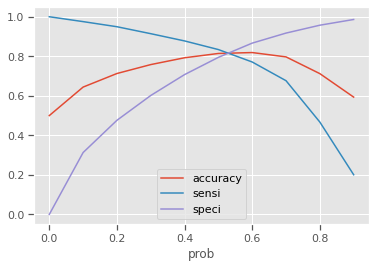

In [133]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [134]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.473368          0    1    1    1    1    1    0    0    0    0   
1      0    0.207084          0    1    1    1    0    0    0    0    0    0   
2      0    0.010890          0    1    0    0    0    0    0    0    0    0   
3      0    0.055721          0    1    0    0    0    0    0    0    0    0   
4      0    0.657313          1    1    1    1    1    1    1    1    0    0   

   0.9  final_predicted  
0    0                0  
1    0                0  
2    0                0  
3    0                0  
4    0                1

In [135]:
y_train_pred = lr_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.473368          0
1      0    0.207084          0
2      0    0.010890          0
3      0    0.055721          0
4      0    0.657313          1

In [136]:
# scores for train dataset
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8142389950166112
precision score: 0.8023273235778854
Sensitivity/Recall : 0.8339389534883721
Specificity: 0.7945390365448505
False Positive Rate: 0.2054609634551495
Positive predictive value: 0.8023273235778854
Negative Predictive value: 0.8271278032964063


In [137]:
y_test_pred = lr_pca2.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
5222       0    0.185223          0
95306      0    0.001096          0
14779      0    0.550546          1
11458      0    0.216749          0
21349      0    0.680440          1

In [138]:
# scores for test dataset
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.7963033941276415
precision score : 0.258121940364931
Sensitivity/Recall : 0.7945205479452054
Specificity: 0.7980862403100775
False Positive Rate: 0.20191375968992248
Positive predictive value: 0.258121940364931
Negative Predictive value: 0.977741504674284


#### Scores for test dataset:
- Sensitivity/Recall : 0.7945205479452054
- Roc_auc_score : 0.7963033941276415
- Specificity: 0.7980862403100775

#### Scores for train dataset:
- Roc_auc_score : 0.8142389950166112
- Sensitivity/Recall : 0.8339389534883721
- Specificity: 0.7945390365448505

## Random Forest Classifier

In [139]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,n_jobs=-1,
                    scoring="accuracy",
                    return_train_score=True)
rf.fit(X_train_pca, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [140]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      19.312263      0.378966         0.196829        0.015931   
1      23.859287      0.440808         0.253067        0.011690   
2      26.136629      0.309826         0.274937        0.007653   
3      30.298604      5.069803         0.280324        0.030763   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              10  {'max_depth': 10}           0.883727           0.883987   
1              15  {'max_depth': 15}           0.934077           0.932520   
2              20  {'max_depth': 20}           0.944848           0.945497   
3              25  {'max_depth': 25}           0.948741           0.946276   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.886582           0.884361           0.876574         0.883046   
1           0.930184           0.931343           0.928877         0.931400   
2           0.937970           0.942635           0.940947         0.942380   
3           0.938619           0.943673           0.940818         0.943625   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003390                4            0.911524            0.909999   
1        0.001804                3            0.975018            0.976283   
2        0.002734                2            0.989845            0.990332   
3        0.003637                1            0.996496            0.996528   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.910518            0.908575            0.909289   
1            0.976186            0.975051            0.975635   
2            0.990883            0.990559            0.990332   
3            0.996431            0.995750            0.996561   

   mean_train_score  std_train_score  
0          0.909981         0.001013  
1          0.975635         0.000538  
2          0.990390         0.000339  
3          0.996353         0.000305

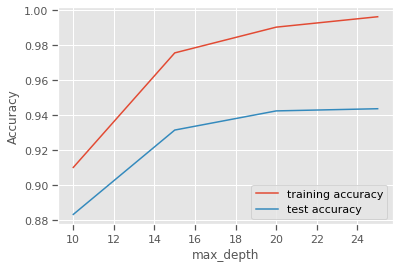

In [141]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Insights:
- max_depth 20 seems to give almost 95% accuracy

As we can see that as we increase the value of max_depth, both train and test scores increase till a certain point, but after that test score becomes constant. The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_Estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [142]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=20)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs=-1,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20), n_jobs=-1,
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [143]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.225524      2.463190         0.143694        0.006203   
1      20.157767      0.481737         0.209980        0.013245   
2      28.981031      1.951503         0.290493        0.017517   
3      32.865518      3.236388         0.342614        0.038688   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.944978   
1                 75   {'n_estimators': 75}           0.944199   
2                100  {'n_estimators': 100}           0.947314   
3                125  {'n_estimators': 125}           0.945108   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.941863           0.936802           0.938741           0.939779   
1           0.943161           0.936413           0.939260           0.937573   
2           0.942772           0.936413           0.940428           0.937443   
3           0.944459           0.938360           0.940039           0.940169   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.940433        0.002799                3            0.990494   
1         0.940121        0.003061                4            0.989261   
2         0.940874        0.003923                2            0.989520   
3         0.941627        0.002663                1            0.990104   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.990234            0.990332            0.989975   
1            0.990396            0.989975            0.990754   
2            0.990364            0.990267            0.990072   
3            0.990818            0.990624            0.991013   

   split4_train_score  mean_train_score  std_train_score  
0            0.989943          0.990195         0.000211  
1            0.990267          0.990131         0.000502  
2            0.990948          0.990234         0.000461  
3            0.990299          0.990572         0.000332

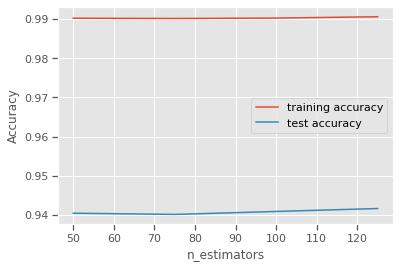

In [144]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
- n_estimators 80 looks good.

### Tuning Max_features

Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [145]:
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs=-1,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_tr)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=80),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [146]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.733137      0.447997         0.226093        0.006350   
1      41.264967      0.551084         0.223238        0.005093   
2      70.834971      0.980904         0.256260        0.057775   
3     103.078221     10.940181         0.198036        0.008353   
4       0.088628      0.008443         0.000000        0.000000   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.946535   
1                  8   {'max_features': 8}           0.943550   
2                 14  {'max_features': 14}           0.943291   
3                 20  {'max_features': 20}           0.938619   
4                 24  {'max_features': 24}                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.943161           0.937192           0.941726           0.939390   
1           0.940176           0.936802           0.940947           0.938482   
2           0.937451           0.936413           0.937573           0.937573   
3           0.935635           0.931612           0.931084           0.932771   
4                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.941601        0.003198                1            0.989423   
1         0.939992        0.002283                2            0.990234   
2         0.938460        0.002454                3            0.990072   
3         0.933944        0.002818                4            0.988677   
4              NaN             NaN                5                 NaN   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.989326            0.990559            0.990559   
1            0.990656            0.991500            0.990462   
2            0.990948            0.991078            0.990040   
3            0.989910            0.990267            0.989099   
4                 NaN                 NaN                 NaN   

   split4_train_score  mean_train_score  std_train_score  
0            0.990235          0.990020         0.000541  
1            0.991013          0.990773         0.000444  
2            0.990429          0.990513         0.000432  
3            0.989748          0.989540         0.000574  
4                 NaN               NaN              NaN

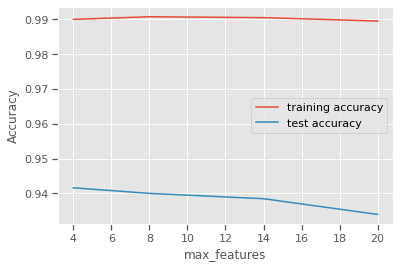

In [147]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
- Selecting max_features = 4

### Tuning min_sample_leaf

In [148]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs=-1,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_tr)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=4,
                                              n_estimators=80),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [149]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.444818      0.110035         0.161653        0.017355   
1      19.107123      3.307369         0.300958        0.157516   
2      14.243134      0.936624         0.146419        0.012355   
3      13.052212      0.408280         0.130285        0.011622   
4      11.819171      0.424796         0.135385        0.020831   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.843628   
1                    150  {'min_samples_leaf': 150}           0.834804   
2                    200  {'min_samples_leaf': 200}           0.832858   
3                    250  {'min_samples_leaf': 250}           0.830132   
4                    300  {'min_samples_leaf': 300}           0.823644   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.845964           0.845834           0.851785           0.844257   
1           0.837659           0.838438           0.845555           0.836989   
2           0.832728           0.832728           0.843608           0.833874   
3           0.834285           0.832209           0.838287           0.829461   
4           0.832079           0.828445           0.834912           0.829072   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.846294        0.002889                1            0.855363   
1         0.838689        0.003640                2            0.847090   
2         0.835159        0.004246                3            0.841931   
3         0.832875        0.003190                4            0.837843   
4         0.829631        0.003780                5            0.835053   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.855655            0.855558            0.854589   
1            0.846311            0.847544            0.845408   
2            0.839465            0.840666            0.840087   
3            0.839238            0.837454            0.835123   
4            0.834988            0.834858            0.833858   

   split4_train_score  mean_train_score  std_train_score  
0            0.853908          0.855015         0.000668  
1            0.847873          0.846845         0.000890  
2            0.841287          0.840687         0.000867  
3            0.838400          0.837612         0.001381  
4            0.835675          0.834886         0.000586

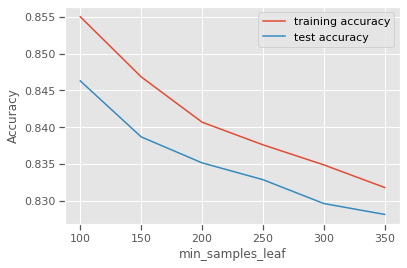

In [150]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
- min_samples_leaf 100 looks good

### Tuning min_sample_split

In [151]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=4,min_samples_leaf=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs=-1,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_tr)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=4,
                                              min_samples_leaf=100,
                                              n_estimators=80),
             n_jobs=-1, param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [152]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.393725      0.169402         0.157976        0.001497   
1      15.156312      0.702034         0.165843        0.025445   
2      14.839062      0.422372         0.159909        0.011889   
3      14.903329      0.353350         0.156377        0.009624   
4      13.728944      1.153802         0.157034        0.023576   

  param_min_samples_split                      params  split0_test_score  \
0                      50   {'min_samples_split': 50}           0.843499   
1                     100  {'min_samples_split': 100}           0.841552   
2                     150  {'min_samples_split': 150}           0.844537   
3                     200  {'min_samples_split': 200}           0.846353   
4                     250  {'min_samples_split': 250}           0.841163   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.845445           0.846483           0.850487           0.842570   
1           0.844537           0.846613           0.850746           0.845165   
2           0.846353           0.847262           0.852693           0.843478   
3           0.846094           0.847262           0.851136           0.846853   
4           0.842590           0.844277           0.851006           0.840234   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.845697        0.002765                4            0.855785   
1         0.845723        0.003005                3            0.855623   
2         0.846865        0.003202                2            0.856693   
3         0.847540        0.001843                1            0.858023   
4         0.843854        0.003828                5            0.853027   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.855298            0.855623            0.853810   
1            0.854747            0.854876            0.854524   
2            0.854195            0.855039            0.854167   
3            0.856531            0.857245            0.854232   
4            0.852865            0.852248            0.852545   

   split4_train_score  mean_train_score  std_train_score  
0            0.853421          0.854787         0.000977  
1            0.855206          0.854995         0.000384  
2            0.855790          0.855177         0.000967  
3            0.855822          0.856371         0.001296  
4            0.853259          0.852789         0.000356

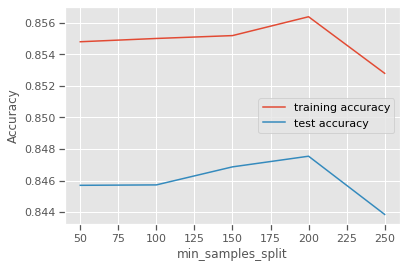

In [153]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
- min_sample_split 50 looks good

### Fitting the final model with the best parameters obtained.

In [154]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=4,
                             n_estimators=80,
                             random_state=10)

In [155]:
# fit
rf_pca=rfc.fit(X_train_pca,y_tr)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [156]:
# scores
print ("Accuracy :",metrics.roc_auc_score(y_tr, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_tr, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_tr, rtrain_predprob))

Accuracy : 0.8592452242524917
Recall/Sensitivity : 0.837468853820598
AUC Score (Train): 0.9377345233151401


In [157]:
#scores for test dataset
pred_probs_test = rf_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.7943911277476903
precision score: 0.33766233766233766
Sensitivity/Recall : 0.7123287671232876
Specificity: 0.876453488372093
False Positive Rate: 0.12354651162790697
Positive predictive value: 0.33766233766233766
Negative Predictive value: 0.9717969379532635
Accuracy : 0.8631204095259293


In [158]:
#lets check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted
0      0    0.306167          0
1      0    0.225586          0
2      0    0.101437          0
3      0    0.104636          0
4      0    0.276170          0

In [159]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.306167          0    1    1    1    1    0    0    0    0    0   
1      0    0.225586          0    1    1    1    0    0    0    0    0    0   
2      0    0.101437          0    1    1    0    0    0    0    0    0    0   
3      0    0.104636          0    1    1    0    0    0    0    0    0    0   
4      0    0.276170          0    1    1    1    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [160]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.576464  0.999896  0.153032
0.2   0.2  0.726147  0.991642  0.460652
0.3   0.3  0.828774  0.962832  0.694716
0.4   0.4  0.859505  0.902772  0.816238
0.5   0.5  0.859245  0.837469  0.881022
0.6   0.6  0.843101  0.762458  0.923744
0.7   0.7  0.805284  0.655783  0.954786
0.8   0.8  0.732818  0.487126  0.978509
0.9   0.9  0.628841  0.263341  0.994342


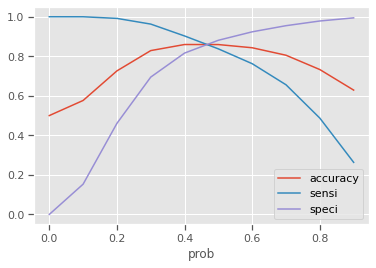

In [161]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Insights:
- From the curve above, 0.45 seems to be the optimum point to take it as a cutoff probability.

In [162]:
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted
0      0    0.306167          0
1      0    0.225586          0
2      0    0.101437          0
3      0    0.104636          0
4      0    0.276170          0

In [163]:
# scores for train dataset
confusion = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8636575996677742
precision score: 0.8560248005285358
Sensitivity/Recall : 0.8743770764119602
Specificity: 0.8529381229235881
False Positive Rate: 0.14706187707641197
Positive predictive value: 0.8560248005285358
Negative Predictive value: 0.8716248474881969


In [164]:
y_test_predrf = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_predrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['Churn_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_predrf_final.head()

Churn  Churn_Prob  predicted
5222       0    0.127531          0
95306      0    0.104080          0
14779      0    0.378894          0
11458      0    0.284919          0
21349      0    0.385149          0

In [165]:
# scores for test dataset
confusion = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8030040418923224
precision score : 0.3065410199556541
Sensitivity/Recall : 0.7575342465753425
Specificity: 0.8484738372093024
False Positive Rate: 0.15152616279069767
Positive predictive value: 0.3065410199556541
Negative Predictive value: 0.9753550543024228


#### Scores for train dataset:
- Roc_auc_score : 0.8636575996677742
- Sensitivity/Recall : 0.8743770764119602
- Specificity: 0.8529381229235881

#### Scores for test dataset:
- Roc_auc_score : 0.8030040418923224
- Sensitivity/Recall : 0.7575342465753425
- Specificity: 0.8484738372093024

In [166]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=4,
                             n_estimators=80,
                             random_state=10)

In [167]:
rfc.fit(x_tr,y_tr)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=80, random_state=10)

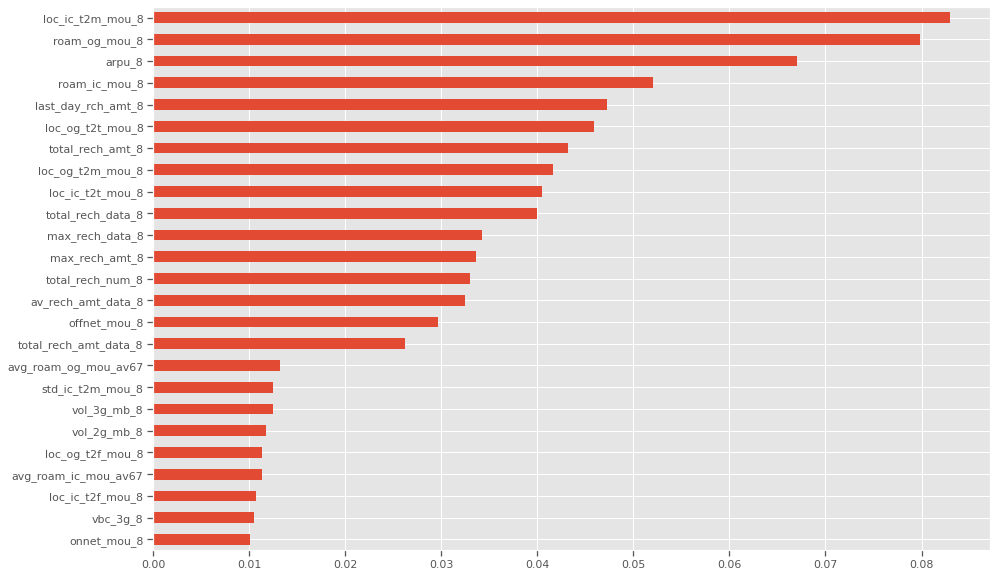

In [168]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(rfc.feature_importances_, index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

#### We could see from above plot that almost all the features of top 25 most important features are from action phase that is August month. Hence we need to focus on these features to identify high value customers who may churn in future.

### Top 10 features:
- loc_ic_t2m_mou_8   : Local Incoming calls Operator T to other operator mobile Minutes of usage - voice calls in 8th Month
- roam_og_mou_8      : Roaming outgoing calls Minutes of usage - voice calls in 8th Month
- arpu_8             : Average revenue per user in 8th month
- roam_ic_mou_8      : Roaming incoming calls Minutes of usage - voice calls in 8th Month
- last_day_rch_amt_8 : Last recharge amount in 8th month
- loc_og_t2t_mou_8   : Local Outgoing calls within same operator mobile Minutes of usage - voice calls in 8th Month
- total_rech_amt_8   : Total recharge amount in 8th month
- loc_og_t2m_mou_8   : Local Outgoing calls to Operator T to other operator mobile Minutes of usage - voice calls in 8th Month
- loc_ic_t2t_mou_8   : Local Incoming calls within same operator mobile Minutes of usage - voice calls in 8th Month
- total_reach_data_8 : Total Recharge of data in 8th month

## Recommend Strategies and Suggestions

- Important factors that Telecom compnay should take into consideration are already mentioned above.

- Number of Incoming and outgoing calls from a mobile number in particular month by customer. If number of calls starts reducing then it may be sign of customer trying to switch from one netwrok to another network or he is has already switched and using current netwrok for few days.

- Recharge amount is very important factor to notice if it starts reducing month by month then it need to be looked as cutomer may not be happy with the services he is getting that is why he started recharging with less amount.

- If data usage starts decreasing and in august month it is minimal then it shows customer is not getting good spped of internet.

- If internet speed that customer is getting is good, customer will finsh data soon and recharge it again but if network is poor and speed is not good then customer will not be able to finish it and will not recharge it multiple times. so need to look into areas where mnetwork is poor and customer care is receiving complaints multiple times.

- if all kinds of call and data usage reduces then it is serious concern as customer may be planning to churn and just timepassing for few more days. so company need to look into these ares.

- if customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very costly and may switch to network where incoming and outgoing services are in reasonable rate.